pip install xgboost --no-cache-dir

pip install hyperopt

pip install shap --no-cache-dir

In [232]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [552]:
data = pd.read_csv("zbior_uczacy.csv", sep=",", decimal=".")

In [386]:
data.head(10)

,GlebokaNiewyplacalnosc2Y,UzycieLiniiKredytowych,Wiek,IloscDo30.59DPD,WskaznikZadluzenia,DochodMiesieczny,LiczbaProduktowKredytowych,Ilosc90DPD,LiczbaHipotek,IloscDo60.89DPD,IloscOsobNaUtrzymaniu
0,0,0.000000,68.0,0,0.634675,1614.0,9,0.0,1.0,0.0,1.0
1,0,0.235419,57.0,0,0.626126,2885.0,7,0.0,1.0,0.0,1.0
2,0,0.338259,48.0,0,0.358659,3250.0,8,0.0,0.0,0.0,0.0
3,0,0.425931,49.0,0,0.512522,4551.0,9,0.0,2.0,0.0,2.0
4,1,0.965058,48.0,0,0.122373,4804.0,3,0.0,0.0,0.0,2.0
5,0,0.011881,41.0,0,0.351130,5000.0,8,0.0,1.0,0.0,0.0
6,0,0.036539,84.0,0,6.000000,NaN,2,0.0,0.0,0.0,0.0
7,0,1.000000,27.0,0,0.101324,3700.0,4,0.0,0.0,0.0,0.0
8,0,0.881374,61.0,4,0.325483,4500.0,9,0.0,2.0,0.0,0.0
9,0,0.009709,68.0,0,0.006245,5283.0,7,0.0,0.0,0.0,0.0


In [586]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Id                          120000 non-null  float64
 1   GlebokaNiewyplacalnosc2Y    120000 non-null  int64  
 2   UzycieLiniiKredytowych      120000 non-null  float64
 3   Wiek                        120000 non-null  float64
 4   IloscDo30.59DPD             120000 non-null  int64  
 5   WskaznikZadluzenia          120000 non-null  float64
 6   DochodMiesieczny            96192 non-null   float64
 7   LiczbaProduktowKredytowych  120000 non-null  int64  
 8   Ilosc90DPD                  120000 non-null  float64
 9   LiczbaHipotek               120000 non-null  float64
 10  IloscDo60.89DPD             120000 non-null  float64
 11  IloscOsobNaUtrzymaniu       120000 non-null  float64
 12  LiczbaLosowa                120000 non-null  float64
dtypes: float64(10)

In [236]:
data.isna().sum().sort_values().nlargest(10)

DochodMiesieczny              23808
IloscOsobNaUtrzymaniu          3133
Id                                0
GlebokaNiewyplacalnosc2Y          0
UzycieLiniiKredytowych            0
Wiek                              0
IloscDo30.59DPD                   0
WskaznikZadluzenia                0
LiczbaProduktowKredytowych        0
Ilosc90DPD                        0
dtype: int64

In [237]:
data.describe()

,Id,GlebokaNiewyplacalnosc2Y,UzycieLiniiKredytowych,Wiek,IloscDo30.59DPD,WskaznikZadluzenia,DochodMiesieczny,LiczbaProduktowKredytowych,Ilosc90DPD,LiczbaHipotek,IloscDo60.89DPD,IloscOsobNaUtrzymaniu,LiczbaLosowa
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,9.619200e+04,120000.000000,120000.000000,120000.000000,120000.000000,116867.000000,1.200000e+05
mean,60000.500000,0.066775,5.866244,52.320333,0.426050,348.231903,6.683413e+03,8.458050,0.272292,1.017950,0.246233,0.755055,3.999372e-01
std,34641.160489,0.249633,251.854696,14.780087,4.256148,1740.189692,1.538419e+04,5.146273,4.233493,1.134624,4.219860,1.112055,2.304956e-01
min,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,4.353933e-07
25%,30000.750000,0.000000,0.029752,41.000000,0.000000,0.174629,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,2.006630e-01
50%,60000.500000,0.000000,0.154296,52.000000,0.000000,0.365923,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,3.989501e-01
75%,90000.250000,0.000000,0.559389,63.000000,0.000000,0.867086,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,5.992965e-01
max,120000.000000,1.000000,50708.000000,105.000000,98.000000,307001.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,10.000000,8.005129e-01


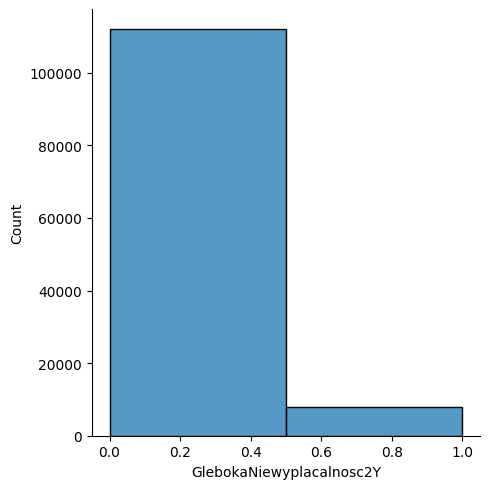

In [238]:
sns.displot(data["GlebokaNiewyplacalnosc2Y"], bins=2, kde=False)

In [553]:
# Checking the Data
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)


# Grab Column Names
def grab_col_names(dataframe, cat_th=10, car_th=20):

# cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


# Outliers Threshold
def outlier_th(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_th(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False  

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_th(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit    
    

# Missing Values
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns
    
# Fill missing values by KNN 
def knn_fill(dataframe,feature):
    from sklearn.impute import KNNImputer
    imputer = KNNImputer(n_neighbors=5)
    dataframe1 = pd.get_dummies(dataframe[[feature]], drop_first=True)
    dataframe1 = pd.DataFrame(scaler.fit_transform(dataframe1), columns=dataframe1.columns)
    dataframe1 = pd.DataFrame(imputer.fit_transform(dataframe1), columns=dataframe1.columns)
    dataframe1 = pd.DataFrame(scaler.inverse_transform(dataframe1), columns=dataframe1.columns)
    dataframe[feature] = dataframe1[feature]

In [554]:
check_data(data)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Id                          120000 non-null  int64  
 1   GlebokaNiewyplacalnosc2Y    120000 non-null  int64  
 2   UzycieLiniiKredytowych      120000 non-null  float64
 3   Wiek                        120000 non-null  int64  
 4   IloscDo30.59DPD             120000 non-null  int64  
 5   WskaznikZadluzenia          120000 non-null  float64
 6   DochodMiesieczny            96192 non-null   float64
 7   LiczbaProduktowKredytowych  120000 non-null  int64  
 8   Ilosc90DPD                  120000 non-null  int64  
 9   LiczbaHipotek               120000 non-null  int64  
 10  IloscDo60.89DPD             120000 non-null  int64  
 11  IloscOsobNaUtrzymaniu       116867 non-null  float64
 12  LiczbaLosow

In [555]:
cat_cols, num_cols, cat_but_car = grab_col_names(data)

Observations: 120000
Variables: 13
cat_cols: 1
num_cols: 12
cat_but_car: 0
num_but_cat: 1


In [556]:
for col in num_cols:
    print(col, check_outlier(data, col))

Id False
UzycieLiniiKredytowych True
Wiek False
IloscDo30.59DPD True
WskaznikZadluzenia True
DochodMiesieczny True
LiczbaProduktowKredytowych True
Ilosc90DPD True
LiczbaHipotek True
IloscDo60.89DPD True
IloscOsobNaUtrzymaniu True
LiczbaLosowa False


In [557]:
# Replacing outliers with threshold values:
#    up_limit = quartile3 + 1.5 * interquantile_range
#    low_limit = quartile1 - 1.5 * interquantile_range

for col in num_cols:
    replace_with_thresholds(data, col)

In [558]:
for col in num_cols:
    print(col, check_outlier(data, col))

Id False
UzycieLiniiKredytowych False
Wiek False
IloscDo30.59DPD False
WskaznikZadluzenia False
DochodMiesieczny False
LiczbaProduktowKredytowych False
Ilosc90DPD False
LiczbaHipotek False
IloscDo60.89DPD False
IloscOsobNaUtrzymaniu False
LiczbaLosowa False


In [559]:
missing_values_table(data)

                       n_miss  ratio
DochodMiesieczny        23808  19.84
IloscOsobNaUtrzymaniu    3133   2.61


In [560]:
# Imputing missing values for variables with small missing values ratio

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
knn_fill(data,"IloscOsobNaUtrzymaniu")

In [561]:
data.groupby(["GlebokaNiewyplacalnosc2Y"]).agg({"GlebokaNiewyplacalnosc2Y": "count"})

,GlebokaNiewyplacalnosc2Y
GlebokaNiewyplacalnosc2Y,
0,111987
1,8013


In [562]:
data["UzycieLiniiKredytowych"].sort_values(ascending=False).head(40)

107247    2.5
65186     2.5
5282      2.5
78286     2.5
44912     2.5
97372     2.5
44902     2.5
62438     2.5
30281     2.5
28923     2.5
32819     2.5
4318      2.5
27267     2.5
113331    2.5
55809     2.5
78346     2.5
30325     2.5
63802     2.5
10037     2.5
18805     2.5
14161     2.5
114581    2.5
16370     2.5
119843    2.5
97548     2.5
20365     2.5
76096     2.5
33048     2.5
53200     2.5
51341     2.5
30139     2.5
87775     2.5
59764     2.5
80468     2.5
40705     2.5
471       2.5
107104    2.5
88845     2.5
79069     2.5
29029     2.5
Name: UzycieLiniiKredytowych, dtype: float64

In [564]:
data["UzycieLiniiKredytowych"].value_counts()

0.000000    8696
1.000000    8218
2.500000     249
1.000000      15
0.950100       7
            ... 
0.609580       1
0.317016       1
0.004591       1
0.054828       1
0.038951       1
Name: UzycieLiniiKredytowych, Length: 100741, dtype: int64

<AxesSubplot:ylabel='UzycieLiniiKredytowych'>

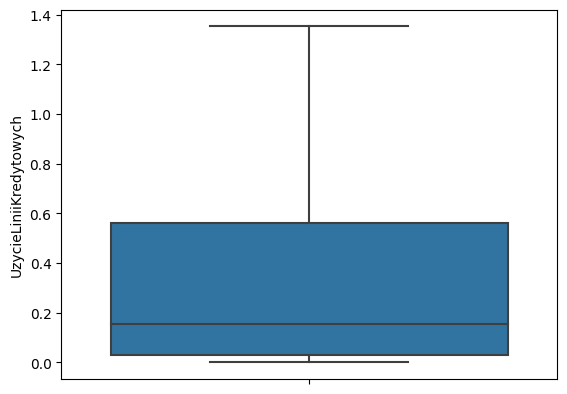

In [565]:
#sns.displot(data[data["UzycieLiniiKredytowych"]<1000]["UzycieLiniiKredytowych"], bins=50, kde=False)
sns.boxplot(y="UzycieLiniiKredytowych", data=data, showfliers=False)

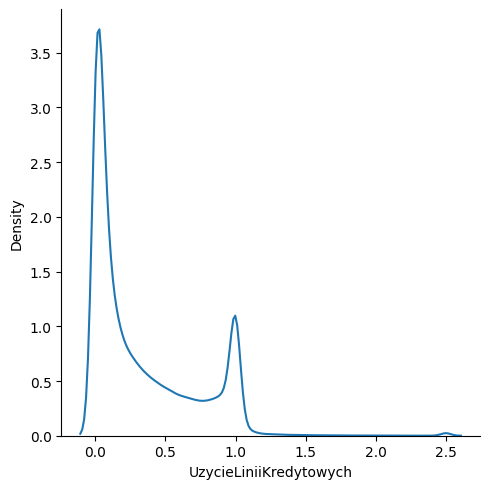

In [566]:
sns.displot(data[data["UzycieLiniiKredytowych"]<10], x="UzycieLiniiKredytowych", kind="kde")

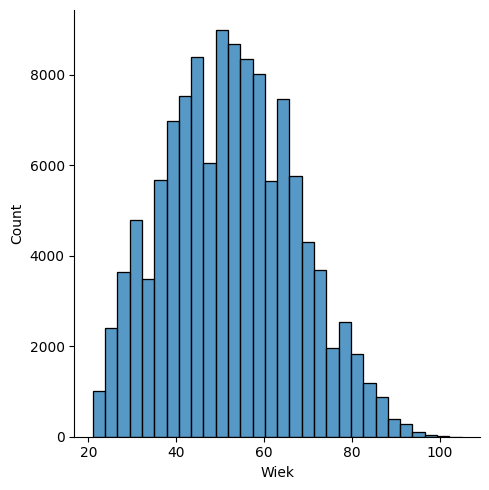

In [567]:
sns.displot(data["Wiek"], bins=30, kde=False)

In [568]:
data["Wiek"].sort_values(ascending=False).head(10)

77275    105.0
26343    103.0
89339    103.0
26795    102.0
48856    102.0
48279    101.0
32716    101.0
41932    101.0
70207     99.0
52246     99.0
Name: Wiek, dtype: float64

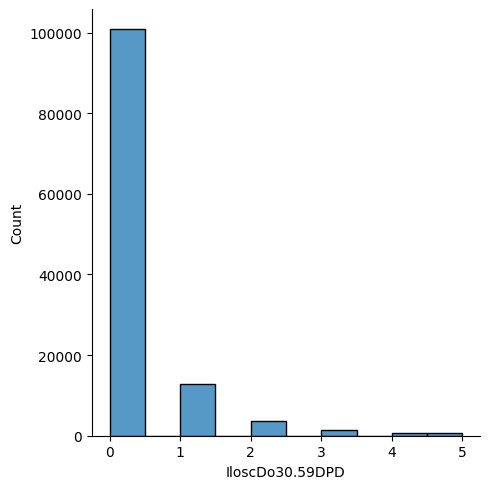

In [569]:
sns.displot(data[data["IloscDo30.59DPD"]<96]["IloscDo30.59DPD"], bins=10, kde=False)

In [570]:
data["IloscDo30.59DPD"].value_counts()#sort_values(ascending=False).head(40)

0    100809
1     12823
2      3694
3      1404
5       672
4       598
Name: IloscDo30.59DPD, dtype: int64

In [571]:
data["IloscDo60.89DPD"].value_counts()

0.0    113865
1.0      4637
2.0       897
2.5       601
Name: IloscDo60.89DPD, dtype: int64

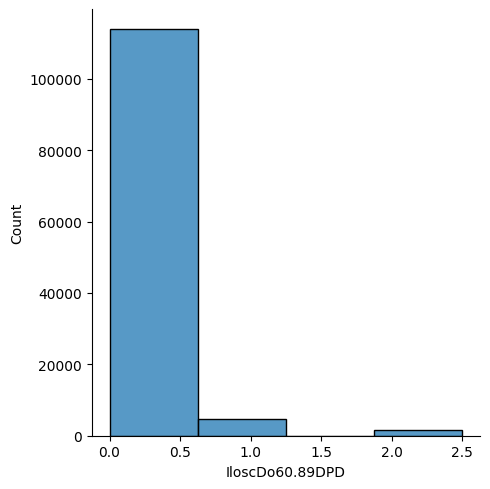

In [572]:
sns.displot(data[data["IloscDo60.89DPD"]<96]["IloscDo60.89DPD"], bins=4, kde=False)

In [573]:
data["Ilosc90DPD"].value_counts()

0.0    113240
1.0      4267
2.5      1249
2.0      1244
Name: Ilosc90DPD, dtype: int64

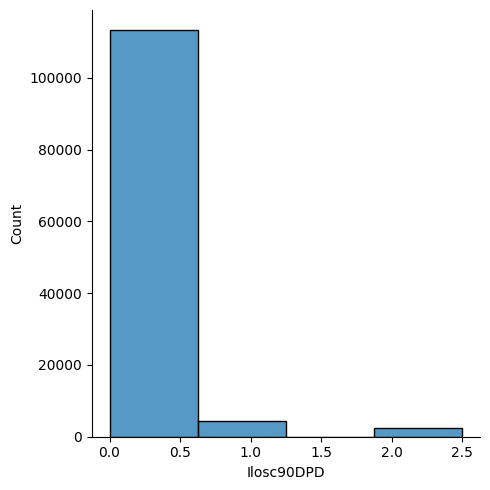

In [574]:
sns.displot(data[data["Ilosc90DPD"]<96]["Ilosc90DPD"], bins=4, kde=False)

<AxesSubplot:ylabel='WskaznikZadluzenia'>

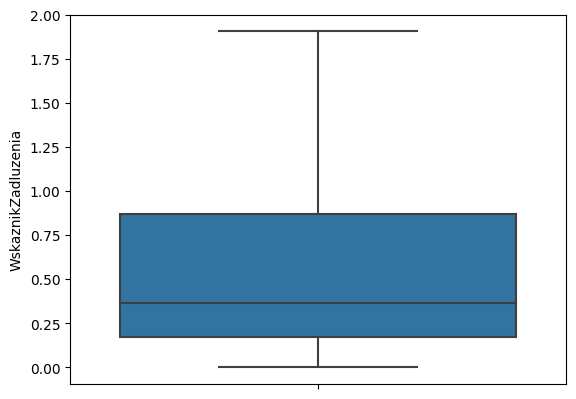

In [575]:
sns.boxplot(y="WskaznikZadluzenia", data=data, showfliers=False)

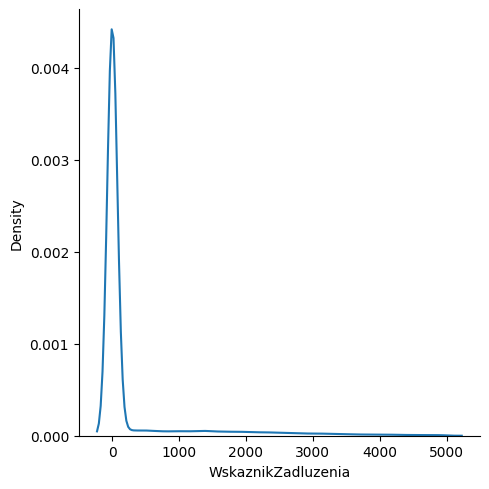

In [576]:
sns.displot(data[data["WskaznikZadluzenia"]<5000], x="WskaznikZadluzenia", kind="kde")

In [577]:
data["WskaznikZadluzenia"].sort_values(ascending=False).head(40)

66090     6097.493701
118870    6097.493701
41665     6097.493701
113395    6097.493701
117737    6097.493701
107762    6097.493701
9290      6097.493701
34459     6097.493701
84592     6097.493701
84480     6097.493701
5629      6097.493701
107717    6097.493701
99242     6097.493701
41772     6097.493701
99254     6097.493701
84453     6097.493701
84414     6097.493701
107703    6097.493701
34411     6097.493701
84413     6097.493701
99283     6097.493701
41851     6097.493701
117614    6097.493701
52071     6097.493701
41884     6097.493701
1064      6097.493701
107639    6097.493701
51980     6097.493701
34325     6097.493701
9301      6097.493701
84723     6097.493701
34492     6097.493701
85516     6097.493701
24411     6097.493701
41215     6097.493701
24378     6097.493701
34665     6097.493701
41247     6097.493701
64896     6097.493701
15015     6097.493701
Name: WskaznikZadluzenia, dtype: float64

<AxesSubplot:ylabel='DochodMiesieczny'>

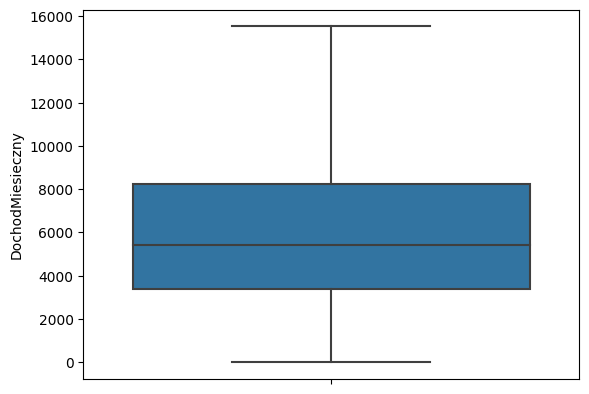

In [578]:
sns.boxplot(y="DochodMiesieczny", data=data, showfliers=False)

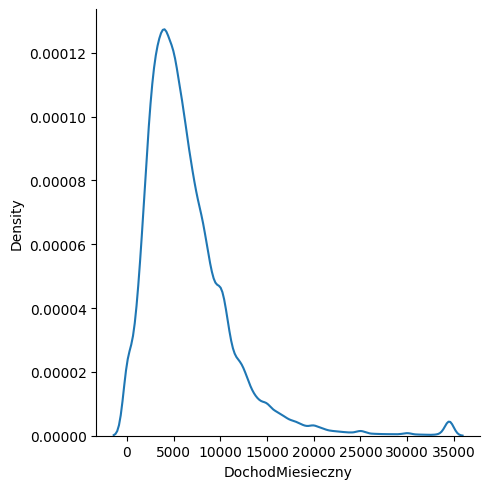

In [579]:
sns.displot(data[data["DochodMiesieczny"]<50000], x="DochodMiesieczny", kind="kde")

<AxesSubplot:ylabel='LiczbaProduktowKredytowych'>

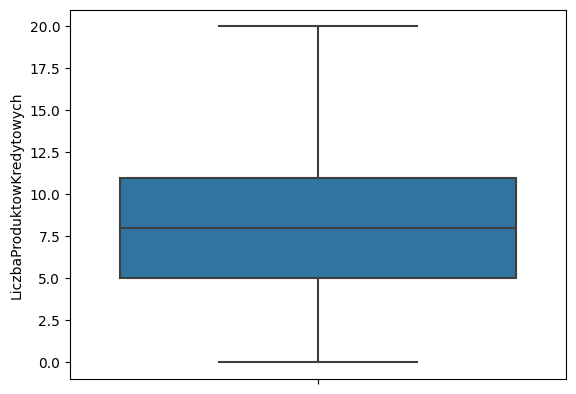

In [580]:
sns.boxplot(y="LiczbaProduktowKredytowych", data=data, showfliers=False)

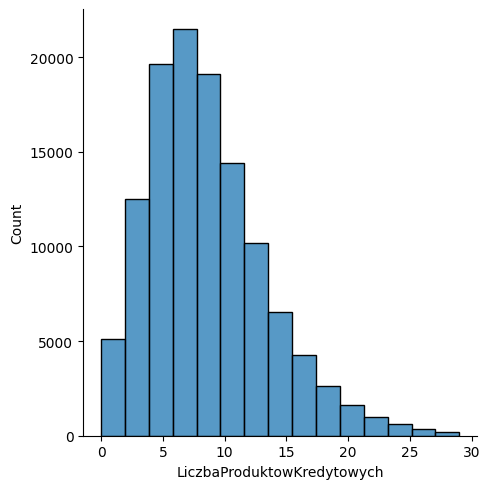

In [581]:
#sns.displot(data[data["LiczbaProduktowKredytowych"]<40], x="LiczbaProduktowKredytowych", kind="kde")
sns.displot(data[data["LiczbaProduktowKredytowych"]<30]["LiczbaProduktowKredytowych"], bins=15, kde=False)

<AxesSubplot:ylabel='LiczbaHipotek'>

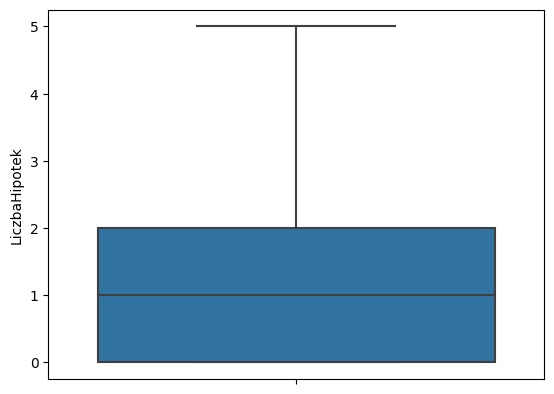

In [582]:
sns.boxplot(y="LiczbaHipotek", data=data, showfliers=False)

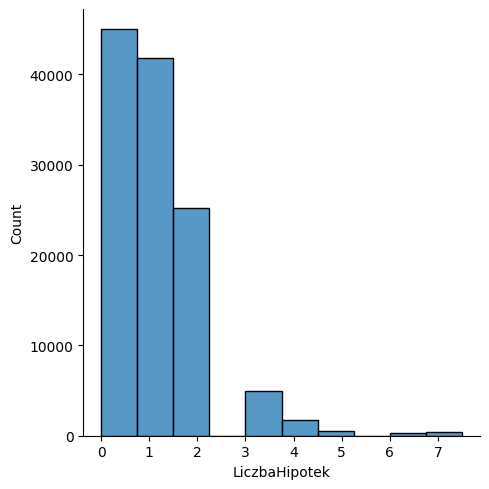

In [583]:
#sns.displot(data[data["LiczbaHipotek"]<10], x="LiczbaHipotek", kind="kde")
sns.displot(data[data["LiczbaHipotek"]<10]["LiczbaHipotek"], bins=10, kde=False)

<AxesSubplot:ylabel='IloscOsobNaUtrzymaniu'>

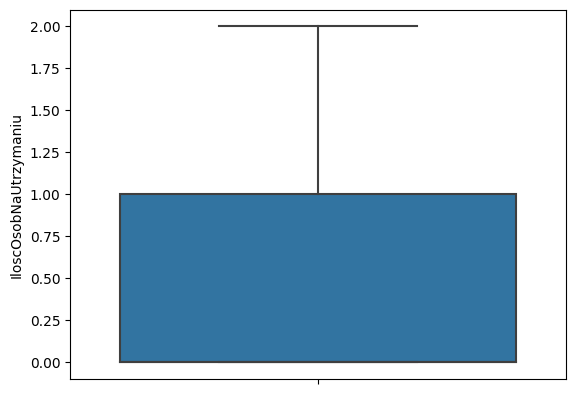

In [584]:
sns.boxplot(y="IloscOsobNaUtrzymaniu", data=data, showfliers=False)

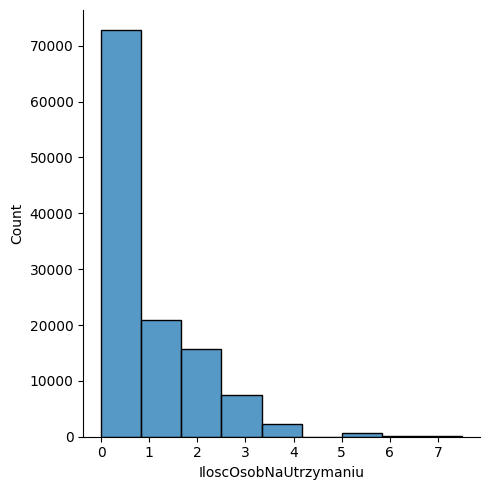

In [585]:
sns.displot(data[data["IloscOsobNaUtrzymaniu"]<9]["IloscOsobNaUtrzymaniu"], bins=9, kde=False)

In [587]:
data.drop(["Id","LiczbaLosowa"],
    axis=1,
    inplace=True)

In [428]:
master=data

In [429]:
master.head()

,GlebokaNiewyplacalnosc2Y,UzycieLiniiKredytowych,Wiek,IloscDo30.59DPD,WskaznikZadluzenia,DochodMiesieczny,LiczbaProduktowKredytowych,Ilosc90DPD,LiczbaHipotek,IloscDo60.89DPD,IloscOsobNaUtrzymaniu
0,0,0.000000,68.0,0,0.634675,1614.0,9,0.0,1.0,0.0,1.0
1,0,0.235419,57.0,0,0.626126,2885.0,7,0.0,1.0,0.0,1.0
2,0,0.338259,48.0,0,0.358659,3250.0,8,0.0,0.0,0.0,0.0
3,0,0.425931,49.0,0,0.512522,4551.0,9,0.0,2.0,0.0,2.0
4,1,0.965058,48.0,0,0.122373,4804.0,3,0.0,0.0,0.0,2.0


In [430]:
# Model constructions

In [431]:
import random

import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC  # SVC - Support Vector Classifier
from xgboost import XGBClassifier
import lightgbm as lgb

In [432]:
from sklearn import preprocessing


def convert(df):
#    number = preprocessing.LabelEncoder()
    df = df.fillna(-9999)
    return df


master = convert(master)

<AxesSubplot:>

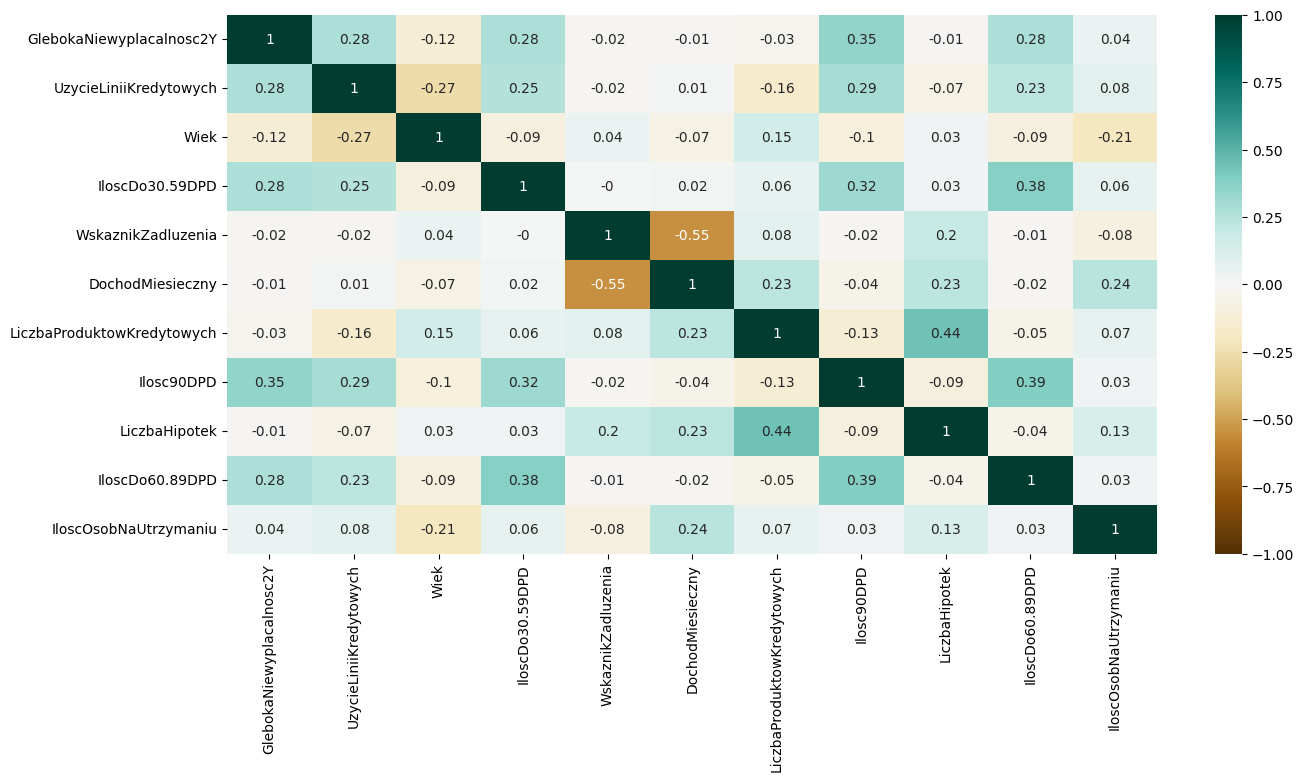

In [433]:
plt.figure(figsize=(15, 7))
sns.heatmap(master.corr().round(2), vmin=-1, vmax=1, annot=True, cmap="BrBG")

In [434]:
random.seed(244)

X = master.iloc[:, 1:].values
y = master.iloc[:, 0].values
print(pd.Series(y).value_counts())

0    111987
1      8013
dtype: int64


In [435]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=325
)

In [437]:
# Balancing data decreasing major class by 0.5 
# increasing minor class by ratio which give significance change - this time 0.4

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SVMSMOTE

X_train, y_train
# values to evaluate
k_values = [1, 2, 3, 4, 5]
for k in k_values:
    # define pipeline
    model = XGBClassifier(n_estimators = 15,
                            max_depth = 3,
                            learning_rate = 0.05,
                            objective="binary:logistic",
                            eval_metric="auc",
                            eta=1
                            )
    over = SVMSMOTE(sampling_strategy=k/10)
    under = RandomUnderSampler(sampling_strategy=0.5)
    X_train_sm, y_train_sm = over.fit_resample(X_train, y_train)
    y_train_sm = pd.DataFrame(y_train_sm)
    y_train_sm.columns = ["Class"]
    X_train_smu, y_train_smu = under.fit_resample(X_train_sm, y_train_sm)
    y_train_smu = pd.DataFrame(y_train_smu)
    y_train_smu.columns = ["Class"]
    scaler = RobustScaler().fit(X_train_smu)
    X_train_smu_sc = scaler.transform(X_train_smu)
    X_test_smu_sc = scaler.transform(X_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(estimator = model, X = X_train_smu_sc, y = y_train_smu, cv = cv, scoring="roc_auc")
    score = mean(scores)
    print('> k=%d, Mean ROC AUC: %.4f' % (k, score))

> k=1, Mean ROC AUC: 0.8761
> k=2, Mean ROC AUC: 0.9269
> k=3, Mean ROC AUC: 0.9395
> k=4, Mean ROC AUC: 0.9526
> k=5, Mean ROC AUC: 0.9557


In [588]:
bsms=SVMSMOTE(sampling_strategy=0.4)
X_train_bsms, y_train_bsms = bsms.fit_resample(X_train, y_train)

In [589]:
y_train_bsms = pd.DataFrame(y_train_bsms)
y_train_bsms.columns = ["Class"]
y_train_bsms["Class"].value_counts()

0    89619
1    35847
Name: Class, dtype: int64

In [590]:
under = RandomUnderSampler(sampling_strategy=0.5)
X_train_bsmsu, y_train_bsmsu = under.fit_resample(X_train_bsms, y_train_bsms)

In [591]:
y_train_bsmsu = pd.DataFrame(y_train_bsmsu)
y_train_bsmsu.columns = ["Class"]
y_train_bsmsu["Class"].value_counts()

0    71694
1    35847
Name: Class, dtype: int64

In [592]:
scaler = RobustScaler().fit(X_train_bsmsu)
X_train_bsmsu_sc = scaler.transform(X_train_bsmsu)
X_test_bsmsu_sc = scaler.transform(X_test)

svc_sm = SVC(kernel="rbf")
svc_sm.fit(X_train_sm_sc, np.ravel(y_train_sm))

In [593]:
svc_bsmsu = SVC(#kernel="rbf",
    probability = True)

svc_bsmsu.fit(X_train_bsmsu_sc, np.ravel(y_train_bsmsu))

SVC(probability=True)

In [594]:
rf_bsmsu = RandomForestClassifier(
    n_estimators=15, max_depth=10, min_samples_split=2, bootstrap=True, max_features="auto")
rf_bsmsu.fit(X_train_bsmsu_sc, np.ravel(y_train_bsmsu))

RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=15)

In [595]:
xgbm_bsmsu = xgb.XGBClassifier(n_estimators = 15,    
                        max_depth = 4,
                        eta = 1,
                        #silent = 1,
                        objective = "binary:logistic",
                        eval_metric = "auc",
                        learning_rate = 0.03
)

xgbm_bsmsu.fit(X_train_bsmsu_sc,  np.ravel(y_train_bsmsu))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=1,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=15, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [596]:
lgbm_bsmsu = lgb.LGBMClassifier(max_depth = 4,
                            metric = 'auc',#best_lg['metric'],
                            objective = 'binary',
                            boosting = 'gbdt',#best_lg['boosting'],
                            learning_rate = 0.03,
                            num_leaves = 20,
                            max_bin = 100,
                            #feature_fraction = 0.8,
                            #subsample = 0.2,
                            is_unbalance = 'true',
                            force_col_wise = 'true',
                            bagging_freq = 5,
                            num_boost_round = 300
                            )

lgbm_bsmsu.fit(X_train_bsmsu_sc,  np.ravel(y_train_bsmsu))

[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMClassifier(bagging_freq=5, boosting='gbdt', force_col_wise='true',
               is_unbalance='true', learning_rate=0.03, max_bin=100,
               max_depth=4, metric='auc', num_boost_round=300, num_leaves=20,
               objective='binary')

In [597]:
# Ensamble model using voting classifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import VotingClassifier

final_model = VotingClassifier(
    estimators=[
        #("svc_bsmsu", svc_bsmsu),
        (
            "rf_bsmsu",
           rf_bsmsu,
        ),
        (
            "xgbm_bsmsu",
            xgbm_bsmsu,
        ),
        (
            "lgb_bsmsu",
            lgbm_bsmsu
        )
    ],
     voting='soft'
)

final_model_score = cross_val_score(final_model, X_train_bsmsu_sc, np.ravel(y_train_bsmsu),  scoring="roc_auc", cv=StratifiedKFold())

final_model.fit(X_train_bsmsu_sc, np.ravel(y_train_bsmsu))

[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_fr

VotingClassifier(estimators=[('rf_bsmsu',
                              RandomForestClassifier(max_depth=10,
                                                     max_features='auto',
                                                     n_estimators=15)),
                             ('xgbm_bsmsu',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False, eta=1,
                                            eval_metric='auc', gamma=0,
                                            gpu_id=-1, grow_pol...
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=15, n_jobs=0,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=0,
                                            reg_alpha=0, ...)),
                             ('lgb_bsmsu',
                              LGBMClassifier(bagging_freq=5, boosting='gbdt',
                                             force_col_wise='true',
                                             is_unbalance='true',
                                             learning_rate=0.03, max_bin=100,
                                             max_depth=4, metric='auc',
                                             num_boost_round=300, num_leaves=20,
                                             objective='binary'))],
                 voting='soft')

In [598]:
# Hyperparameter tuning by Hyperopt

from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
from sklearn.model_selection import cross_val_score, StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

In [599]:
def objective(space):

    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    classifier = RandomForestClassifier(n_estimators = space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            max_features = "auto",#space['max_features'],
                            #min_samples_leaf = space['min_samples_leaf'],
                            min_samples_split = 2,#space['min_samples_split'],
                            bootstrap=True
                            )
    
    classifier.fit(X_train_und_sc, np.ravel(y_train_und))

    # Applying k-Fold Cross Validation
    score = cross_val_score(estimator = classifier, X = X_train_bsmsu_sc, y = np.ravel(y_train_bsmsu), cv = StratifiedKFold(), scoring="roc_auc")
    CrossValMean = score.mean()

    print("CrossValMean:", CrossValMean)

    return{'loss':-CrossValMean, 'status': STATUS_OK }

space = {#'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.choice('max_depth', range(3, 10, 1)),
        #'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        #'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        #'min_samples_split' : hp.uniform('min_samples_split', 0, 10),
        'n_estimators' : hp.choice('n_estimators', range(5, 25, 1))
    }
 
trials = Trials()
best_rf = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

print("Best: ", best_rf)

CrossValMean:                                         
0.950728443387766                                     
CrossValMean:                                                                      
0.9672967947488184                                                                 
CrossValMean:                                                                       
0.9559100287151201                                                                  
CrossValMean:                                                                       
0.9572895938519675                                                                  
CrossValMean:                                                                       
0.9531822409983114                                                                  
CrossValMean:                                                                       
0.9626436804948832                                                                  
CrossValMean:                             

In [600]:
rf_bsmsu_hyp = RandomForestClassifier(#criterion = 'entropy',
                            n_estimators = best_rf['n_estimators'],
                            max_depth = best_rf['max_depth'],
                            max_features = "auto",#space['max_features'],
                            #min_samples_leaf = space['min_samples_leaf'],
                            min_samples_split = 2,#space['min_samples_split'],
                            bootstrap=True
                            )

rf_bsmsu_hyp.fit(X_train_bsmsu_sc,  np.ravel(y_train_bsmsu))

RandomForestClassifier(max_depth=6, max_features='auto', n_estimators=16)

In [601]:
#warnings.filterwarnings(action='ignore', category=DeprecationWarning)

def objective(space):
    
    classifier = lgb.LGBMClassifier(n_estimators = space['n_estimators'],
                            num_leaves = 20,#space['num_leaves'],
                            max_depth = space['max_depth'],
                            max_bin = 100,#space['max_bin'],
                            metric = 'auc',#space['metric'],
                            boosting = 'gbdt',#space['boosting'],
                            learning_rate = 0.03,#space['learning_rate'],
                            #feature_fraction = 0.8,#space['feature_fraction'],
                            #subsample = 0.2,#space['subsample'],
                            objective ='binary',
                            is_unbalance = 'true',
                            force_col_wise = 'true',
                            bagging_freq = 5,
                            num_boost_round = 300
                            )
    
    classifier.fit(X_train_bsmsu_sc, np.ravel(y_train_bsmsu))
    
    score = cross_val_score(estimator = classifier, X = X_train_bsmsu_sc, y = np.ravel(y_train_bsmsu), scoring="roc_auc", cv=StratifiedKFold())
    CrossValMean = score.mean()
    
    print("CrossValMean:", CrossValMean)

    return{'loss':-CrossValMean, 'status': STATUS_OK }

space = {
    'n_estimators': hp.choice('n_estimators', range(4, 30, 1)),
    'max_depth': hp.choice('max_depth', range(2, 9, 1))
    #'metric':  hp.choice('metric',['auc', 'binary_logloss']),
    #'boosting':  hp.choice('boosting',['gbdt', 'dart']),#, 'goss']),
    #'num_leaves': hp.choice('num_leaves', range(20, 150, 5)),
    #'max_bin': hp.choice('max_bin', range(100, 400, 20)),
    #'feature_fraction' : hp.quniform('feature_fraction', 0.1, 1.0, 0.1),
    #'subsample' : hp.quniform('subsample', 0.1, 1.0, 0.1),
    #'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.02)
}

trials = Trials()
best_lg = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print("Best: ", best_lg)

[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_fr

In [602]:
lgbm_bsmsu_hyp = lgb.LGBMClassifier(n_estimators = best_lg['n_estimators'],
                            max_depth = best_lg['max_depth'],
                            metric = 'auc',#best_lg['metric'],
                            boosting = 'gbdt',#best_lg['boosting'],
                            learning_rate = 0.03,#best_lg['learning_rate'],
                            num_leaves = 20,
                            max_bin = 100,
                            #feature_fraction = 0.8,
                            #subsample = 0.2,
                            objective = 'binary',
                            is_unbalance = 'true',
                            force_col_wise = 'true',
                            bagging_freq = 5,
                            num_boost_round = 300
                            )

lgbm_bsmsu_hyp.fit(X_train_bsmsu_sc,  np.ravel(y_train_bsmsu))

[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMClassifier(bagging_freq=5, boosting='gbdt', force_col_wise='true',
               is_unbalance='true', learning_rate=0.03, max_bin=100,
               max_depth=3, metric='auc', n_estimators=17, num_boost_round=300,
               num_leaves=20, objective='binary')

In [619]:
def objective(space):

    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    classifier = xgb.XGBClassifier(n_estimators = space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            learning_rate = 0.03,#space['learning_rate'],
                            gamma = space['gamma'],
                            #min_child_weight = space['min_child_weight'],
                            #subsample = space['subsample'],
                            #colsample_bytree = space['colsample_bytree'],
                            objective="binary:logistic"
                            )
    
    classifier.fit(X_train_smu_sc, np.ravel(y_train_smu))

    # Applying k-Fold Cross Validation
    accuracies = cross_val_score(estimator = classifier, X = X_train_smu_sc, y = np.ravel(y_train_smu), cv = 10, scoring="roc_auc")
    CrossValMean = accuracies.mean()

    print("CrossValMean:", CrossValMean)

    return{'loss':-CrossValMean, 'status': STATUS_OK }

space = {
    'max_depth' : hp.choice('max_depth', range(2, 10, 1)),
    #'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(5, 25, 1)),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    #'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    #'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    #'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)
}

trials = Trials()
best_xg = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print("Best: ", best_xg)

CrossValMean:                                          
0.970026132107963                                      
CrossValMean:                                                                    
0.9621831920516339                                                               
CrossValMean:                                                                    
0.9624724887801692                                                               
CrossValMean:                                                                    
0.9521855242849024                                                               
CrossValMean:                                                                    
0.9648484106652997                                                               
CrossValMean:                                                                    
0.9700883452414646                                                               
CrossValMean:                                                       

In [620]:
xgbm_bsmsu_hyp = xgb.XGBClassifier(n_estimators = best_xg['n_estimators'],
                            max_depth = best_xg['max_depth'],
                            learning_rate = 0.03,#best_xg['learning_rate'],
                            gamma = best_xg['gamma'],
                            #min_child_weight = best_xg['min_child_weight'],
                            #subsample = best_xg['subsample'],
                            #colsample_bytree = best_xg['colsample_bytree'],
                            objective="binary:logistic"
                            )

xgbm_bsmsu_hyp.fit(X_train_bsmsu_sc,  np.ravel(y_train_bsmsu))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.18, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=19, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [621]:
final_model_hyp = VotingClassifier(
    estimators=[
        #("svc_bsmsu", svc_bsmsu),
        (
            "rf_bsmsu",
           rf_bsmsu_hyp,
        ),
        (
            "xgbm_bsmsu",
            xgbm_bsmsu_hyp,
        ),
        (
            "lgb_bsmsu",
            lgbm_bsmsu_hyp
        )
    ],
     voting='soft'
)

final_model_hyp_score = cross_val_score(final_model_hyp, X_train_bsmsu_sc, np.ravel(y_train_bsmsu),  scoring="roc_auc", cv=StratifiedKFold())

final_model_hyp.fit(X_train_bsmsu_sc, np.ravel(y_train_bsmsu))

[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_fr

VotingClassifier(estimators=[('rf_bsmsu',
                              RandomForestClassifier(max_depth=6,
                                                     max_features='auto',
                                                     n_estimators=16)),
                             ('xgbm_bsmsu',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0.18,
                                            gpu_id=-1, grow_policy='...
                                            n_estimators=19, n_jobs=0,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=0,
                                            reg_alpha=0, reg_lambda=1, ...)),
                             ('lgb_bsmsu',
                              LGBMClassifier(bagging_freq=5, boosting='gbdt',
                                             force_col_wise='true',
                                             is_unbalance='true',
                                             learning_rate=0.03, max_bin=100,
                                             max_depth=3, metric='auc',
                                             n_estimators=17,
                                             num_boost_round=300, num_leaves=20,
                                             objective='binary'))],
                 voting='soft')

In [622]:
## Models benchmark
prob_svc_bsmsu = svc_bsmsu.predict_proba(X_test_bsmsu_sc)[:, 1]
prob_rf_bsmsu = rf_bsmsu.predict_proba(X_test_bsmsu_sc)[:, 1]
prob_rf_bsmsu_hyp = rf_bsmsu_hyp.predict_proba(X_test_bsmsu_sc)[:, 1]
prob_xgbm_bsmsu = xgbm_bsmsu.predict_proba(X_test_bsmsu_sc)[:, 1]
prob_xgbm_bsmsu_hyp = xgbm_bsmsu_hyp.predict_proba(X_test_bsmsu_sc)[:, 1]
prob_lgbm_bsmsu = lgbm_bsmsu.predict_proba(X_test_bsmsu_sc)[:, 1]
prob_lgbm_bsmsu_hyp = lgbm_bsmsu_hyp.predict_proba(X_test_bsmsu_sc)[:, 1]
prob_final = final_model.predict_proba(X_test_bsmsu_sc)[:, 1]
prob_final_hyp = final_model_hyp.predict_proba(X_test_bsmsu_sc)[:, 1]

print("AUC&ROC SVC BSMSU:", metrics.roc_auc_score(y_test, prob_svc_bsmsu))
print("AUC&ROC RF BSMSU:", metrics.roc_auc_score(y_test, prob_rf_bsmsu))
print("AUC&ROC RF BSMSU HYP:", metrics.roc_auc_score(y_test, prob_rf_bsmsu_hyp))
print("AUC&ROC XGBM BSMSU:", metrics.roc_auc_score(y_test, prob_xgbm_bsmsu))
print("AUC&ROC XGBM BSMSU HYP:", metrics.roc_auc_score(y_test, prob_xgbm_bsmsu_hyp))
print("AUC&ROC LGBM BSMSU:", metrics.roc_auc_score(y_test, prob_lgbm_bsmsu))
print("AUC&ROC LGBM BSMSU HYP:", metrics.roc_auc_score(y_test, prob_lgbm_bsmsu_hyp))
print("AUC&ROC ENSEMBLE BSMSU:", metrics.roc_auc_score(y_test, prob_final))
print("AUC&ROC ENSEMBLE BSMSU HYP:", metrics.roc_auc_score(y_test, prob_final_hyp))

AUC&ROC SVC BSMSU: 0.7871461375143763
AUC&ROC RF BSMSU: 0.8593215683425552
AUC&ROC RF BSMSU HYP: 0.8548858504752939
AUC&ROC XGBM BSMSU: 0.82802651919584
AUC&ROC XGBM BSMSU HYP: 0.8515688964583509
AUC&ROC LGBM BSMSU: 0.8614802018245603
AUC&ROC LGBM BSMSU HYP: 0.8600773092118643
AUC&ROC ENSEMBLE BSMSU: 0.8615320035493632
AUC&ROC ENSEMBLE BSMSU HYP: 0.8593062004062177


AUC&ROC SVC BSMSU: 0.7939022767994894
AUC&ROC RF BSMSU: 0.8582022566157186
AUC&ROC RF BSMSU HYP: 0.8521351816276403
AUC&ROC XGBM BSMSU: 0.8266384329460503
AUC&ROC XGBM BSMSU HYP: 0.8601432324539258
AUC&ROC LGBM BSMSU: 0.8620506645523016
AUC&ROC LGBM BSMSU HYP: 0.8625747906235097
AUC&ROC ENSEMBLE BSMSU: 0.8611942513727594
AUC&ROC ENSEMBLE BSMSU HYP: 0.8624653796828101

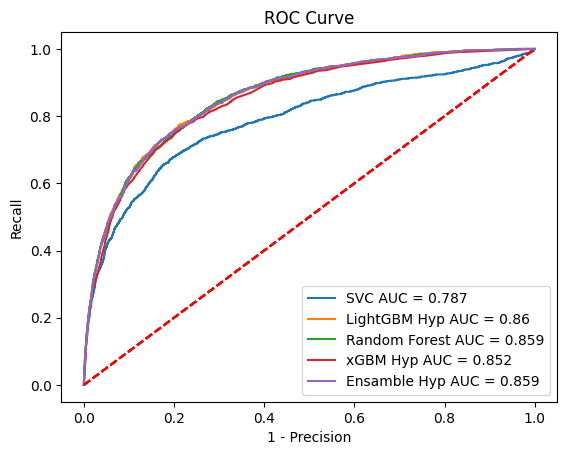

In [623]:
## Models benchmark - ROC chart
from sklearn.metrics import roc_auc_score, roc_curve


def plot_roc(y_test, prob, model_name=""):

    fpr, recall, tresh = roc_curve(y_test, prob)
    auc = roc_auc_score(y_test, prob)

    plt.plot(fpr, recall, label="{} AUC = {}".format(model_name, auc.round(3)))
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlabel("1 - Precision")
    plt.ylabel("Recall")
    plt.title("ROC Curve")
    plt.legend()


plot_roc(y_test, prob_svc_bsmsu, model_name="SVC")
plot_roc(y_test, prob_lgbm_bsmsu_hyp, model_name="LightGBM Hyp")
plot_roc(y_test, prob_rf_bsmsu, model_name="Random Forest")
plot_roc(y_test, prob_xgbm_bsmsu_hyp, model_name="xGBM Hyp")
plot_roc(y_test, prob_final_hyp, model_name = "Ensamble Hyp")

In [624]:
pred_svc_bsmsu = svc_bsmsu.predict(X_test_bsmsu_sc)
pred_lgbm_bsmsu = lgbm_bsmsu_hyp.predict(X_test_bsmsu_sc)
pred_xgbm_bsmsu = xgbm_bsmsu_hyp.predict(X_test_bsmsu_sc)
pred_rf_bsmsu = rf_bsmsu.predict(X_test_bsmsu_sc)
pred_final = final_model_hyp.predict(X_test_bsmsu_sc)


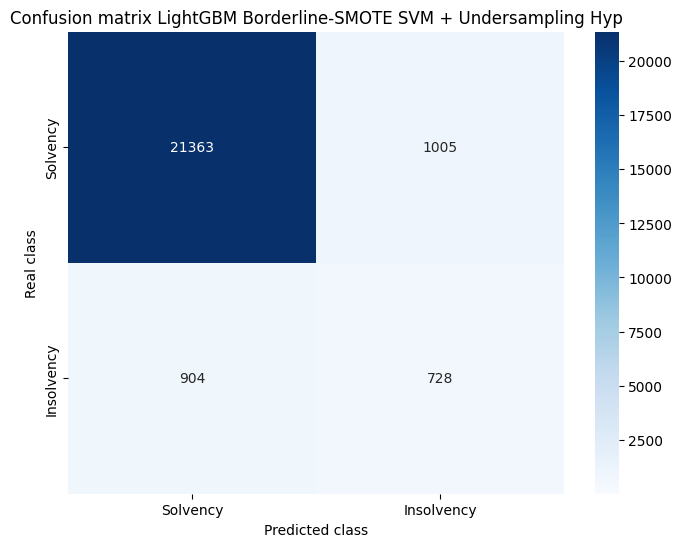

In [635]:
## Confusion Matrix chart

cm = metrics.confusion_matrix(y_test, np.round(pred_lgbm_bsmsu))
labels = ["Solvency", "Insolvency"]
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    xticklabels=labels,
    yticklabels=labels,
    annot=True,
    fmt="d",
    cmap="Blues",
    vmin=0.2,
)
plt.title("Confusion matrix LightGBM Borderline-SMOTE SVM + Undersampling Hyp")
plt.ylabel("Real class")
plt.xlabel("Predicted class")
plt.show()

In [626]:
print(metrics.classification_report(y_test, np.round(pred_svc_bsmsu)))
metrics.confusion_matrix(y_test, np.round(pred_svc_bsmsu))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     22368
           1       0.61      0.02      0.04      1632

    accuracy                           0.93     24000
   macro avg       0.77      0.51      0.50     24000
weighted avg       0.91      0.93      0.90     24000



array([[22344,    24],
       [ 1594,    38]])

In [627]:
print(metrics.classification_report(y_test, np.round(pred_lgbm_bsmsu)))
metrics.confusion_matrix(y_test, np.round(pred_lgbm_bsmsu))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22368
           1       0.42      0.45      0.43      1632

    accuracy                           0.92     24000
   macro avg       0.69      0.70      0.69     24000
weighted avg       0.92      0.92      0.92     24000



array([[21363,  1005],
       [  904,   728]])

In [628]:
print(metrics.classification_report(y_test, np.round(pred_xgbm_bsmsu)))
metrics.confusion_matrix(y_test, np.round(pred_xgbm_bsmsu))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     22368
           1       0.54      0.26      0.35      1632

    accuracy                           0.93     24000
   macro avg       0.74      0.62      0.66     24000
weighted avg       0.92      0.93      0.92     24000



array([[21995,   373],
       [ 1201,   431]])

In [629]:
print(metrics.classification_report(y_test, np.round(pred_rf_bsmsu)))
metrics.confusion_matrix(y_test, np.round(pred_rf_bsmsu))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     22368
           1       0.53      0.31      0.39      1632

    accuracy                           0.93     24000
   macro avg       0.74      0.64      0.68     24000
weighted avg       0.92      0.93      0.93     24000



array([[21920,   448],
       [ 1132,   500]])

In [630]:
print(metrics.classification_report(y_test, np.round(pred_final)))
metrics.confusion_matrix(y_test, np.round(pred_final))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     22368
           1       0.46      0.38      0.41      1632

    accuracy                           0.93     24000
   macro avg       0.71      0.67      0.69     24000
weighted avg       0.92      0.93      0.92     24000



array([[21643,   725],
       [ 1016,   616]])

In [631]:
import shap

In [632]:
shap.initjs()

In [633]:
explainerLGBM = shap.TreeExplainer(lgbm_bsmsu_hyp, X_train_bsmsu_sc)
shap_values_LGBM_test = explainerLGBM.shap_values(X_test_bsmsu_sc)

100%|===================| 23938/24000 [00:52<00:00]        

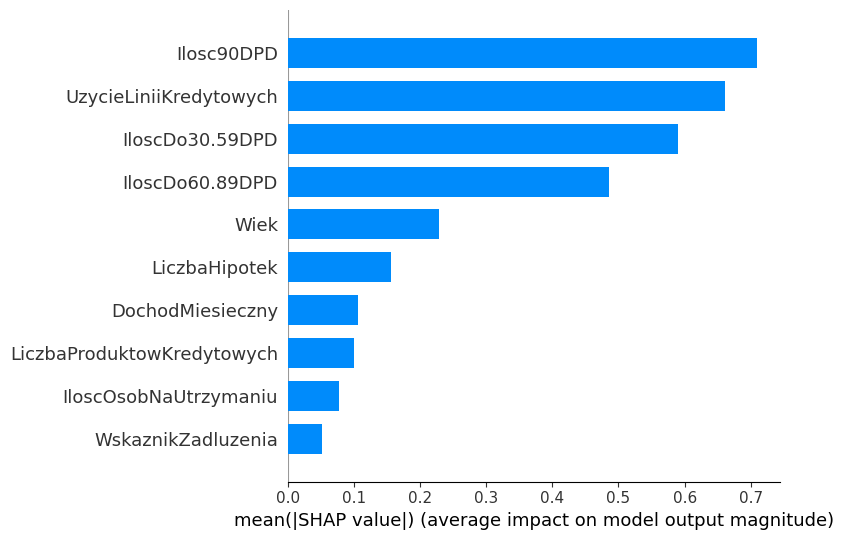

In [634]:
# Feature importance basing on Shap method

shap.summary_plot(
    shap_values_LGBM_test,
    features=scaler.inverse_transform(X_test_bsmsu_sc),
    feature_names=master.iloc[:, 1:].columns,
    plot_type="bar",
)